<a href="https://colab.research.google.com/github/ShanRinna/DL3/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 1
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

# Simple RNN example

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.9.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: kapre


In [ ]:
# Make sample data and label data
sample = np.array([[[0],[1]],
          [[1],[1]],
          [[1],[2]]]
          )
label = np.array([1, 2, 0])

print(sample)

sample = to_categorical(sample)
print(sample)

label = to_categorical(label)
print(label)

[[[0]
  [1]]

 [[1]
  [1]]

 [[1]
  [2]]]
[[[1. 0. 0.]
  [0. 1. 0.]]

 [[0. 1. 0.]
  [0. 1. 0.]]

 [[0. 1. 0.]
  [0. 0. 1.]]]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
# Build Model
model = Sequential()
model.add(layers.SimpleRNN(3,
            input_shape=(2, 3),
            activation='softmax'))
model.summary()

# Compile Model
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])
# Fit model
history = model.fit(sample,
          label,
          epochs=350
          )
# Predict Dinner
predict = model.predict(sample)
print(predict)
predict = np.argmax(predict,axis=1)
predict

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 3)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/350
1/1 [==============================] - 2s 2s/step - loss: 1.2139 - acc: 0.0000e+00
Epoch 2/350
1/1 [==============================] - 0s 27ms/step - loss: 1.2123 - acc: 0.0000e+00
Epoch 3/350
1/1 [==============================] - 0s 22ms/step - loss: 1.2107 - acc: 0.0000e+00
Epoch 4/350
1/1 [==============================] - 0s 16ms/step - loss: 1.2091 - acc: 0.0000e+00
Epoch 5/350
1/1 [==============================] - 0s 12ms/step - loss: 1.2075 - acc: 0.0000e+00
Epoch 6/350
1/1 [==============================] - 0s 16ms/step - loss: 1.2059 - acc: 0.0000e+00
Epoch 

array([1, 2, 0])

In [ ]:
# Build Model
model = Sequential()
model.add(layers.SimpleRNN(10,
            input_shape=(2, 3),
            activation='softmax'))
model.summary()

# Compile Model
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])
# Fit model
history = model.fit(sample,
          label,
          epochs=350
          )
# Predict Dinner
predict = model.predict(sample)
print(predict)
predict = np.argmax(predict,axis=1)
predict

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
Epoch 1/350


ValueError: ignored

In [ ]:
# RNN+DNN Model
model = Sequential()
model.add(layers.SimpleRNN(10,
                           input_shape=(2, 3)))
model.add(layers.Dense(3, activation='softmax'))
model.summary()
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(sample,
                    label,
                    epochs=100
                    )


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.3868 - acc: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 1.3751 - acc: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 1.3635 - acc: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 1.3520 - acc: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 1.3406 - a

In [ ]:
predict = model.predict(sample)
print(predict)
predict = np.argmax(predict,axis=1)
predict


1/1 [==============================] - 0s 159ms/step
[[0.21946597 0.59692204 0.18361202]
 [0.20605066 0.12818648 0.66576284]
 [0.5144486  0.28172353 0.20382795]]


array([1, 2, 0])

In [ ]:
tf.keras.backend.clear_session()

# Realstic Data - BTC

In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [ ]:
data = pd.read_csv('/content/BTC-USD.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


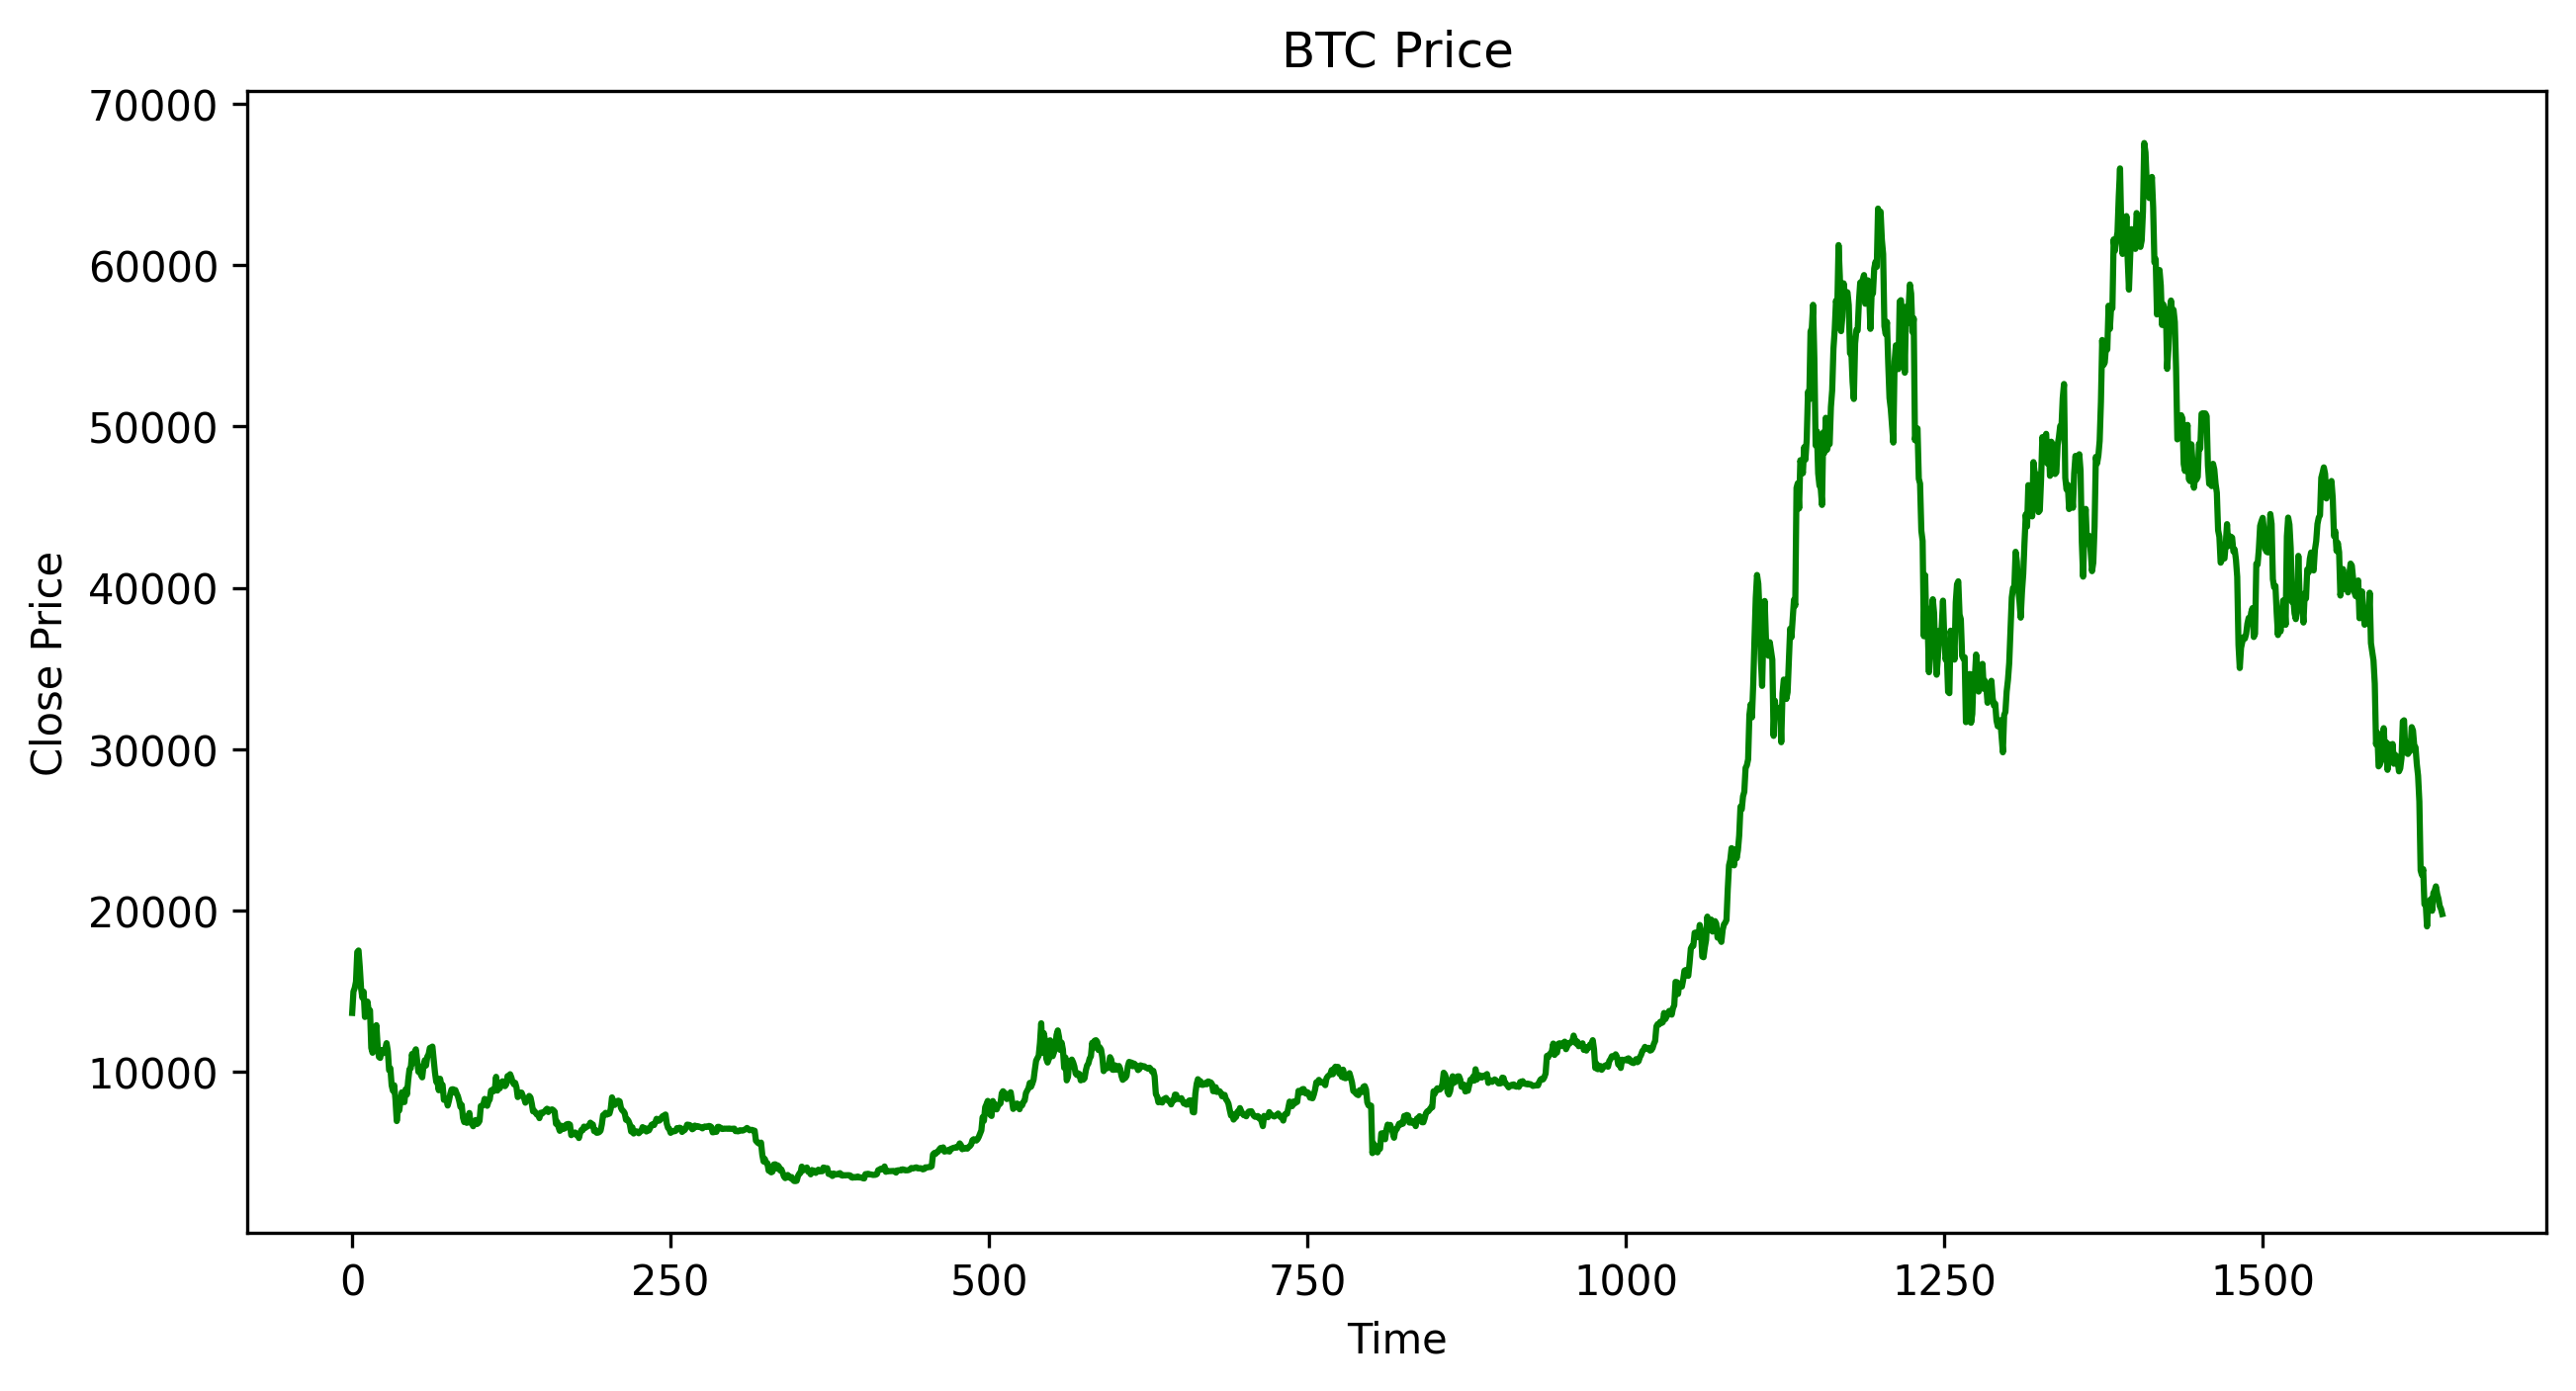

In [ ]:
data=data['Close']
plt.figure(figsize=(10,5),dpi=300)
plt.plot(data, color ='green');
plt.ylabel('Close Price')
plt.title('BTC Price')
plt.xlabel('Time')
plt.show()

In [ ]:

split =int(0.8*data.shape[0])
Train,Test  = data[0:split] , data[split:]

val_split=int(0.8*Train.shape[0])
Train,Val=Train[0:val_split] , Train[val_split:]
Val=Val.reset_index(drop=True)
#Test=Test.reset_index(drop=True)

In [ ]:
Test


,Date,Open,High,Low,Close,Adj Close,Volume
1313,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,38226483046
1314,2021-08-07,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,40030862141
1315,2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,36302664750
1316,2021-08-09,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,38734079049
1317,2021-08-10,46280.847656,46637.988281,44705.554688,45585.031250,45585.031250,33546019517
...,...,...,...,...,...,...,...
1637,2022-06-26,21496.494141,21783.724609,21016.269531,21027.294922,21027.294922,18027170497
1638,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707
1639,2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161
1640,2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,23552740328


In [ ]:
Test=Test.reset_index(drop=True)
Test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,38226483046
1,2021-08-07,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,40030862141
2,2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,36302664750
3,2021-08-09,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,38734079049
4,2021-08-10,46280.847656,46637.988281,44705.554688,45585.031250,45585.031250,33546019517
...,...,...,...,...,...,...,...
324,2022-06-26,21496.494141,21783.724609,21016.269531,21027.294922,21027.294922,18027170497
325,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707
326,2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161
327,2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,23552740328


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1)
train_set= Train.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)
val_set= Val.values.reshape(-1,1)
val_set_scaled = sc.transform(val_set)
test_set = Test.values.reshape(-1,1)
test_set_scaled = sc.transform(test_set)

X_train = []
y_train = []
for i in range(5,len(train_set)):
    X_train.append(training_set_scaled[i-5:i])
    y_train.append(training_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = []
y_val = []
for i in range(5,len(val_set)):
    X_val.append(val_set_scaled[i-5:i])
    y_val.append(val_set_scaled[i])
X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(5,len(test_set)):
    X_test.append(training_set_scaled[i-5:i])
    y_test.append(training_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

ValueError: ignored

In [ ]:
X_train[0]

array([[0.72919977],
       [0.82191337],
       [0.83723155],
       [0.86509673],
       [0.99317716]])

# Fit & compile the model

In [ ]:
keras.backend.clear_session()
model = keras.models.Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
opt=Adam(learning_rate=0.002,beta_1=0.95)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
33/33 [==============================] - 3s 23ms/step - loss: 0.0280 - val_loss: 1.5726
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.5888
Epoch 3/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.3983
Epoch 4/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.3401
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.4293
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.4864
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.5265
Epoch 8/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.5308
Epoch 9/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.5514
Epoch 10/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.5840
Epoch 11

In [ ]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

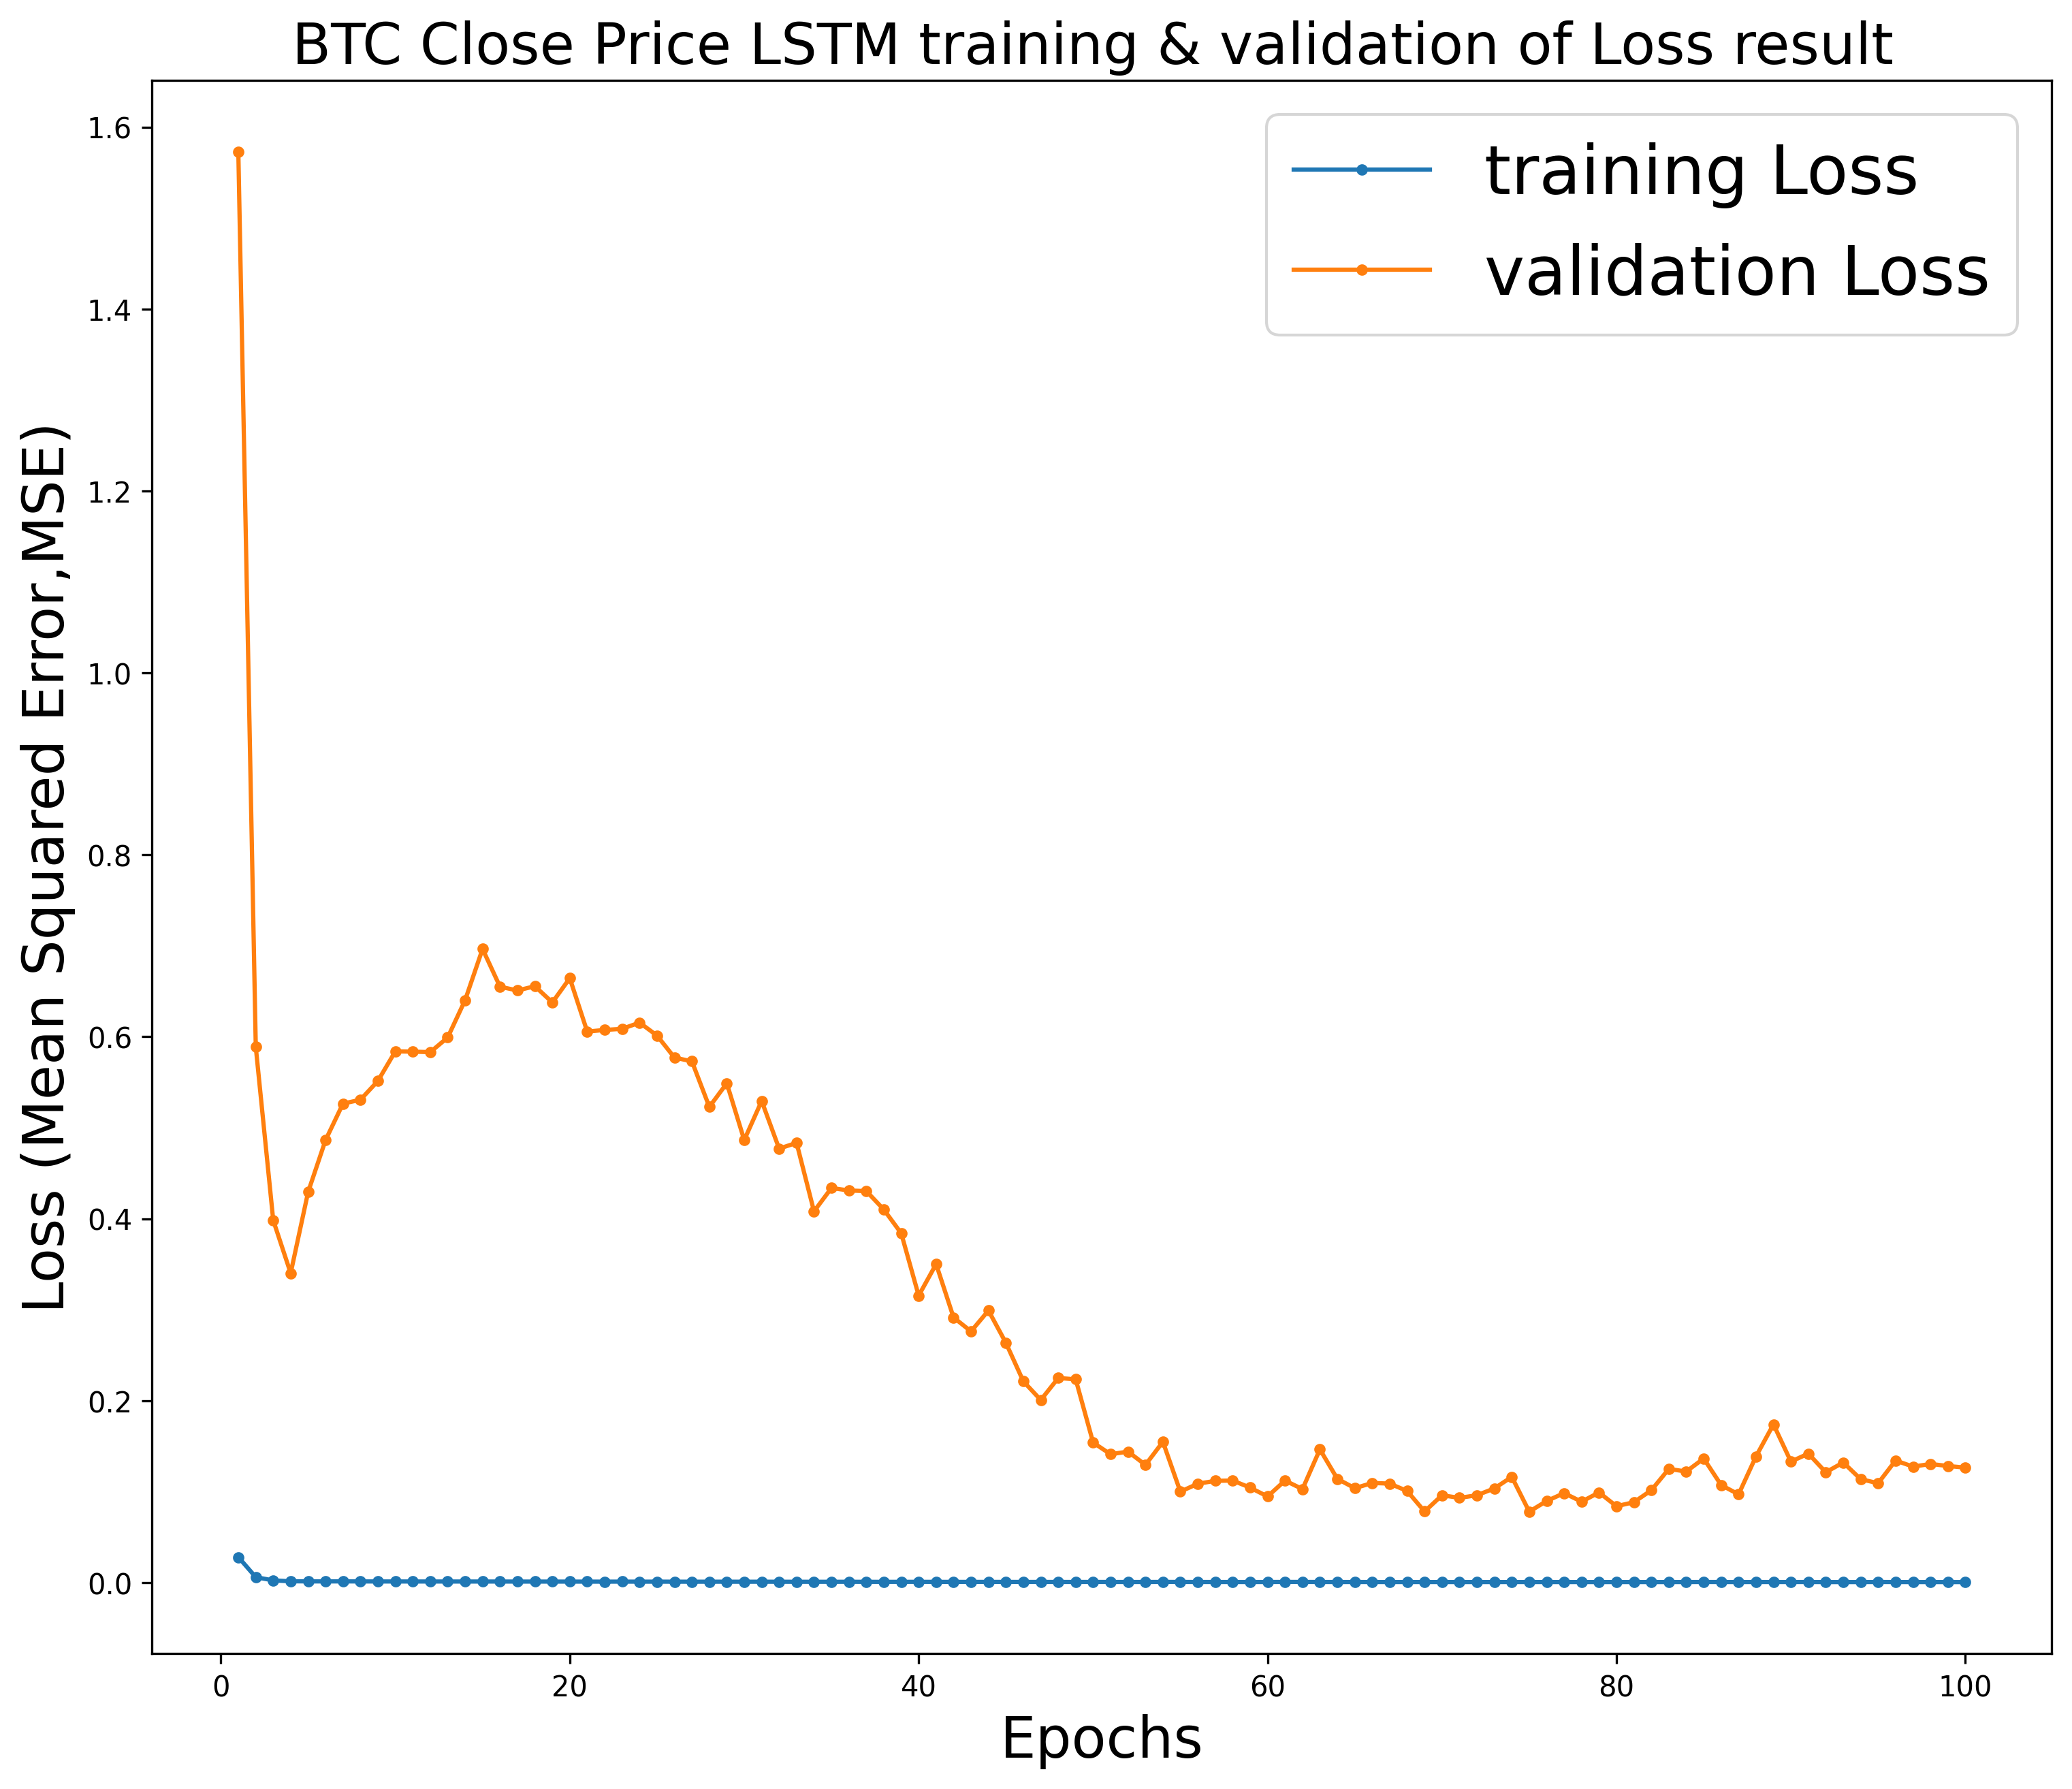

In [ ]:
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('BTC Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

# Testing

In [ ]:

predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

11/11 [==============================] - 0s 3ms/step


In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output.csv', index=False)

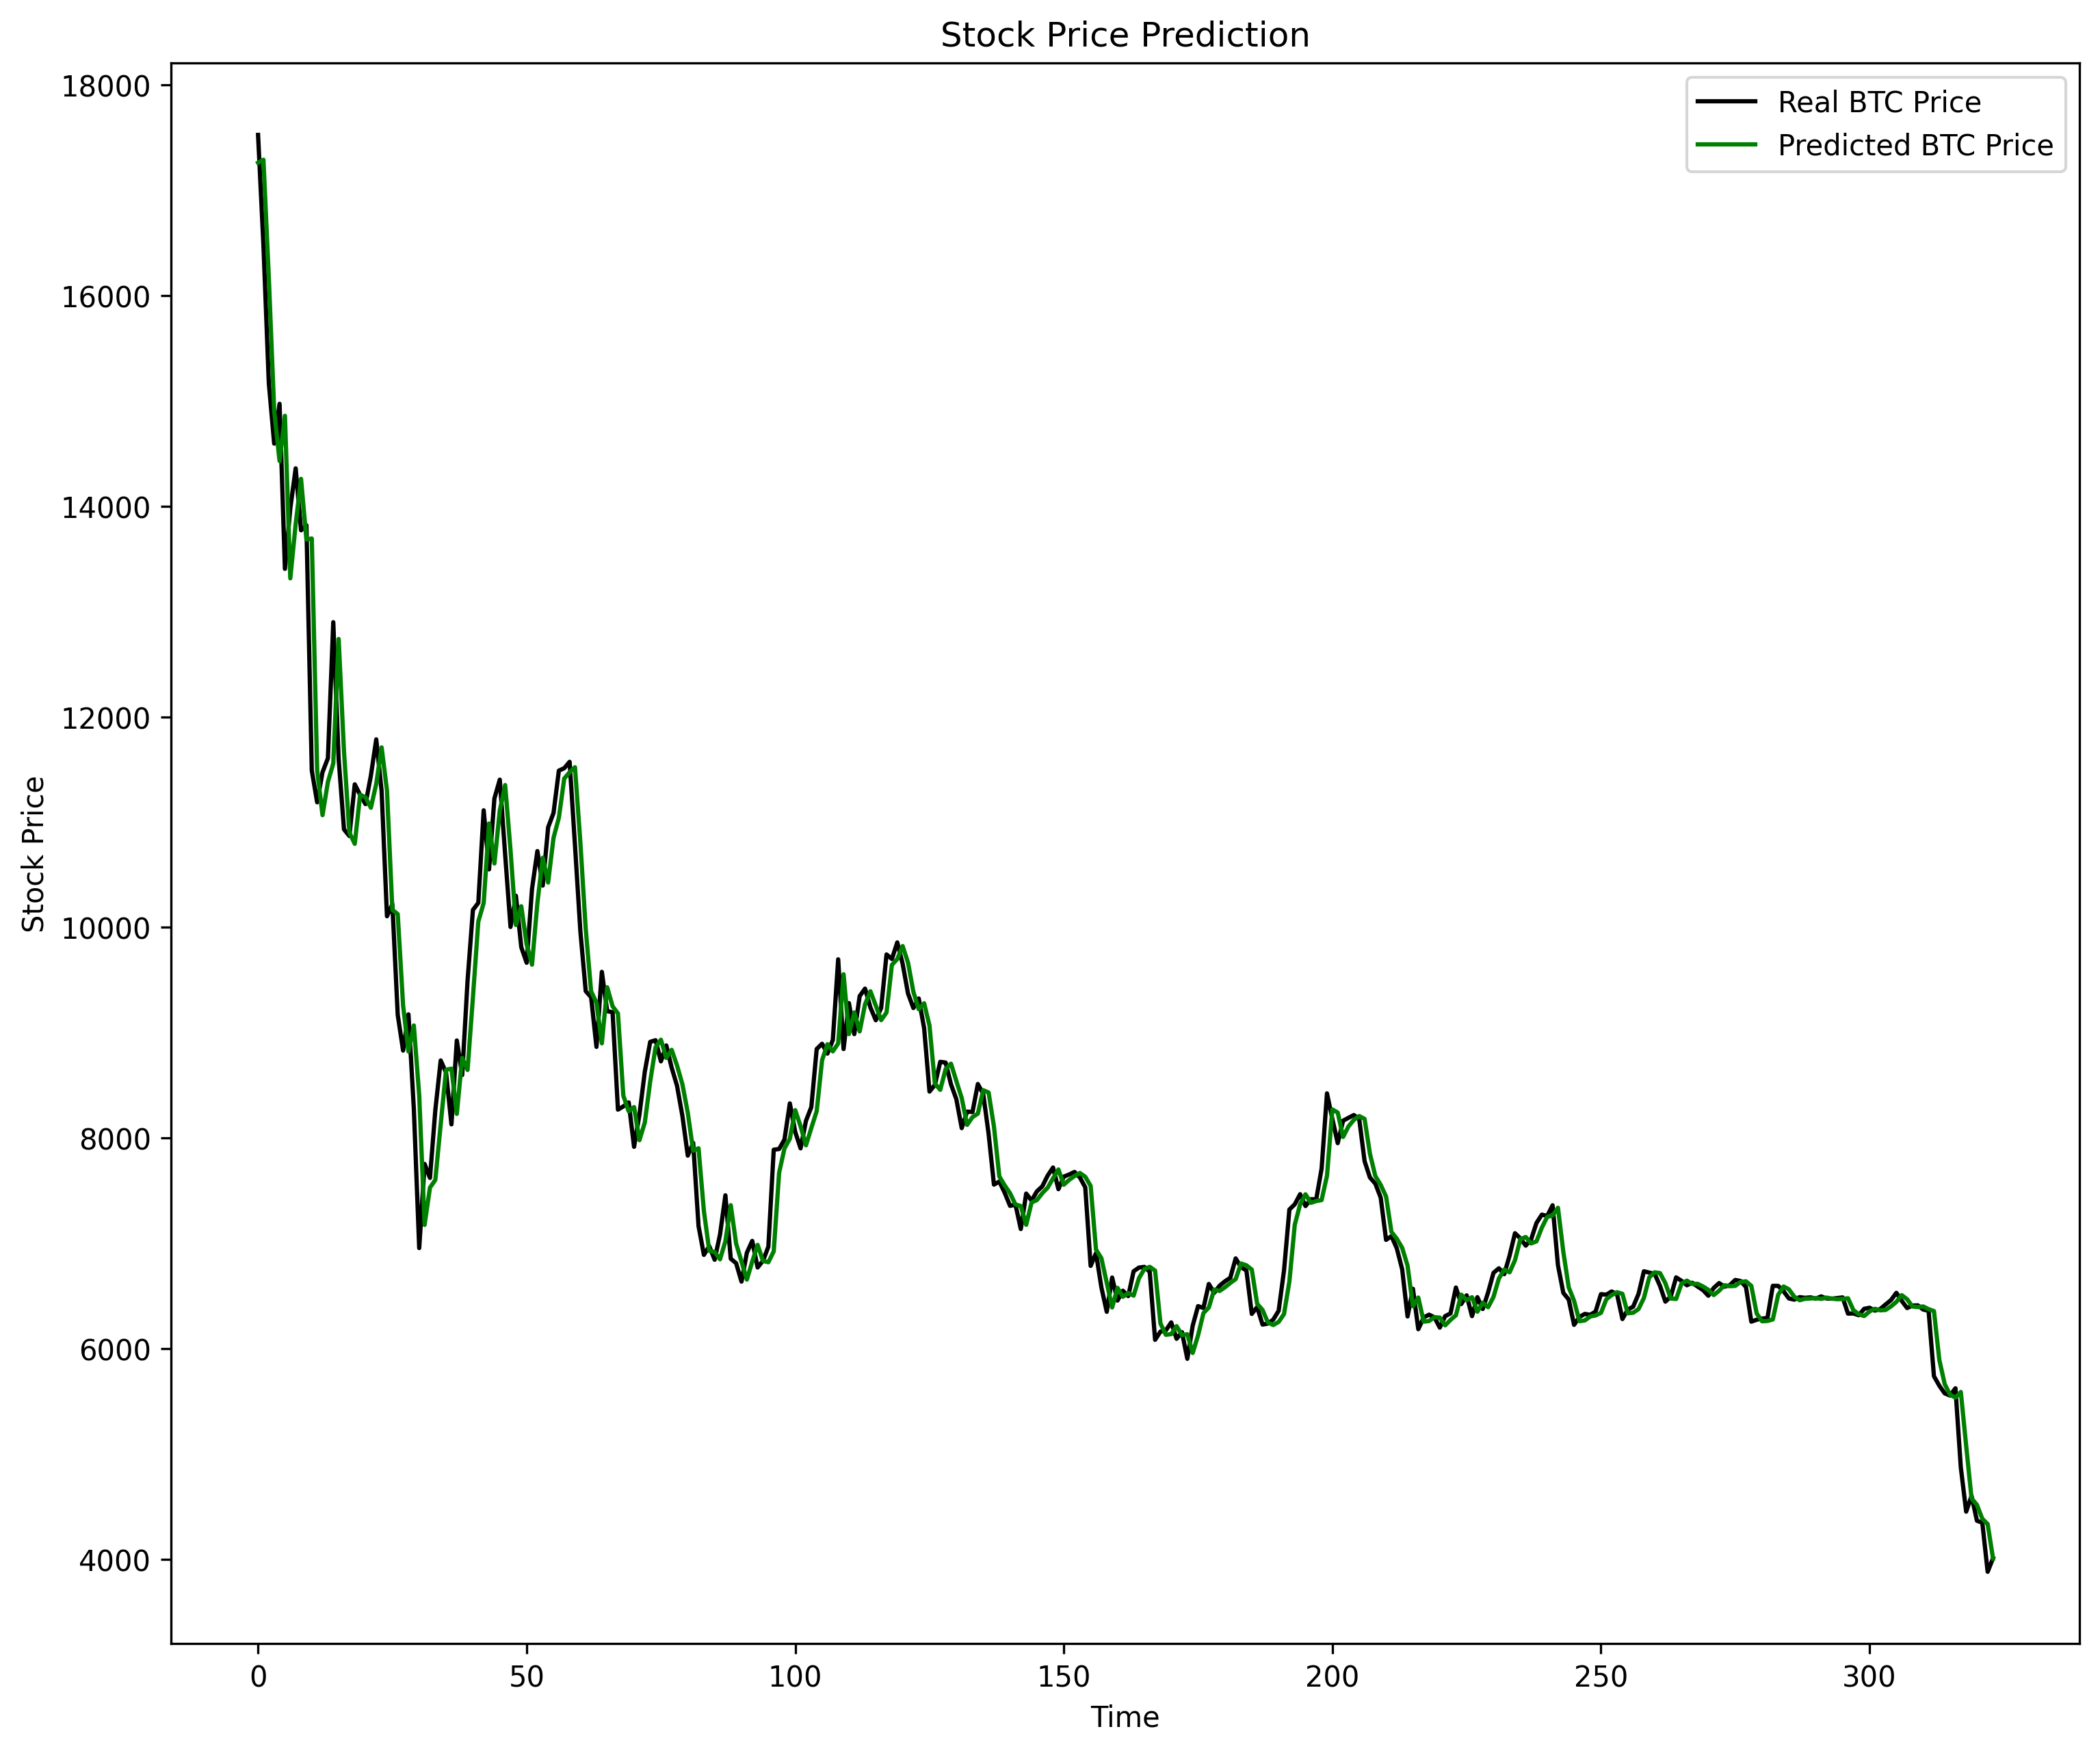

In [ ]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real BTC Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted BTC Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Improve the model

## Build model & Compile & Fit

In [ ]:
keras.backend.clear_session()
model = Sequential()
model.add(LSTM(units = 64,return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 32,activation='relu'))
model.add(Dense(units = 1))
model.summary()
opt=Adam(learning_rate=0.002,beta_1=0.95)
model.compile(optimizer = opt, loss = 'mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## Plot the history of training and validation

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
33/33 [==============================] - 5s 44ms/step - loss: 0.0368 - val_loss: 1.6915
Epoch 2/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0065 - val_loss: 0.0416
Epoch 3/100
33/33 [==============================] - 0s 9ms/step - loss: 0.0026 - val_loss: 1.7335
Epoch 4/100
33/33 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0747
Epoch 5/100
33/33 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.1017
Epoch 6/100
33/33 [==============================] - 0s 10ms/step - loss: 0.0018 - val_loss: 0.2126
Epoch 7/100
33/33 [==============================] - 0s 10ms/step - loss: 0.0018 - val_loss: 0.0828
Epoch 8/100
33/33 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 0.1412
Epoch 9/100
33/33 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 0.0947
Epoch 10/100
33/33 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 0.1607


In [ ]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

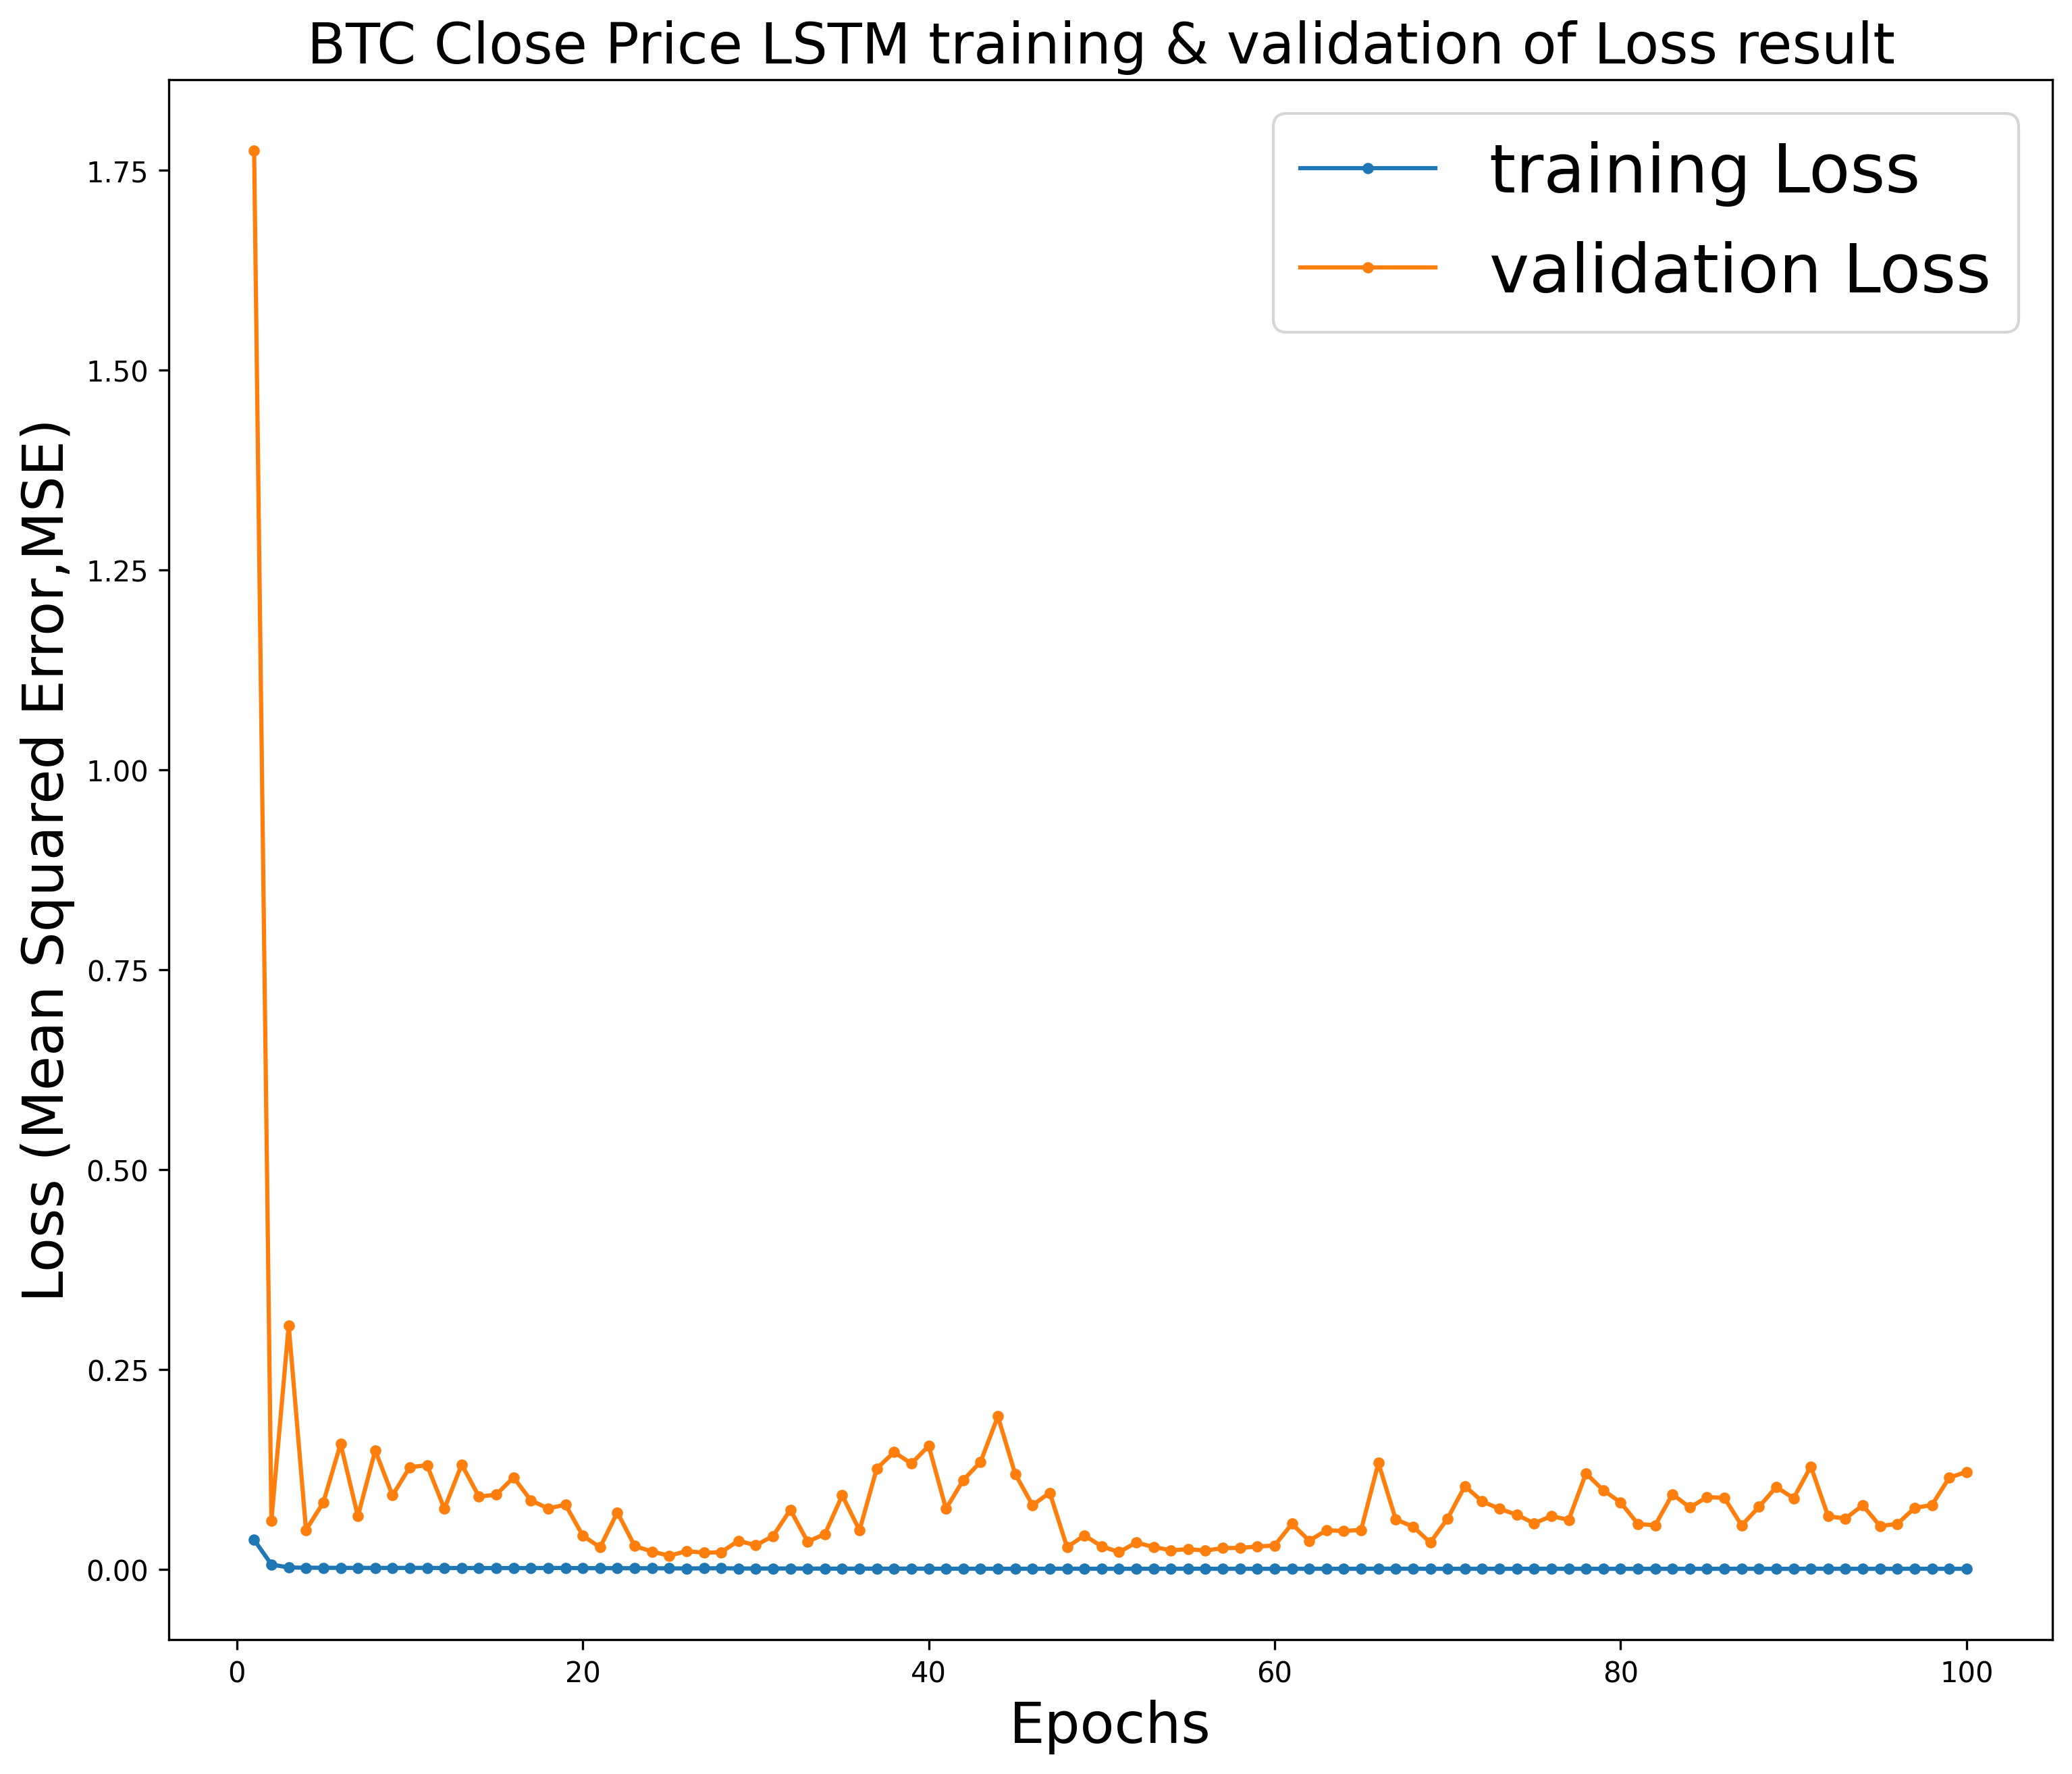

In [ ]:
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('BTC Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

11/11 [==============================] - 1s 3ms/step


In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output2.csv', index=False)

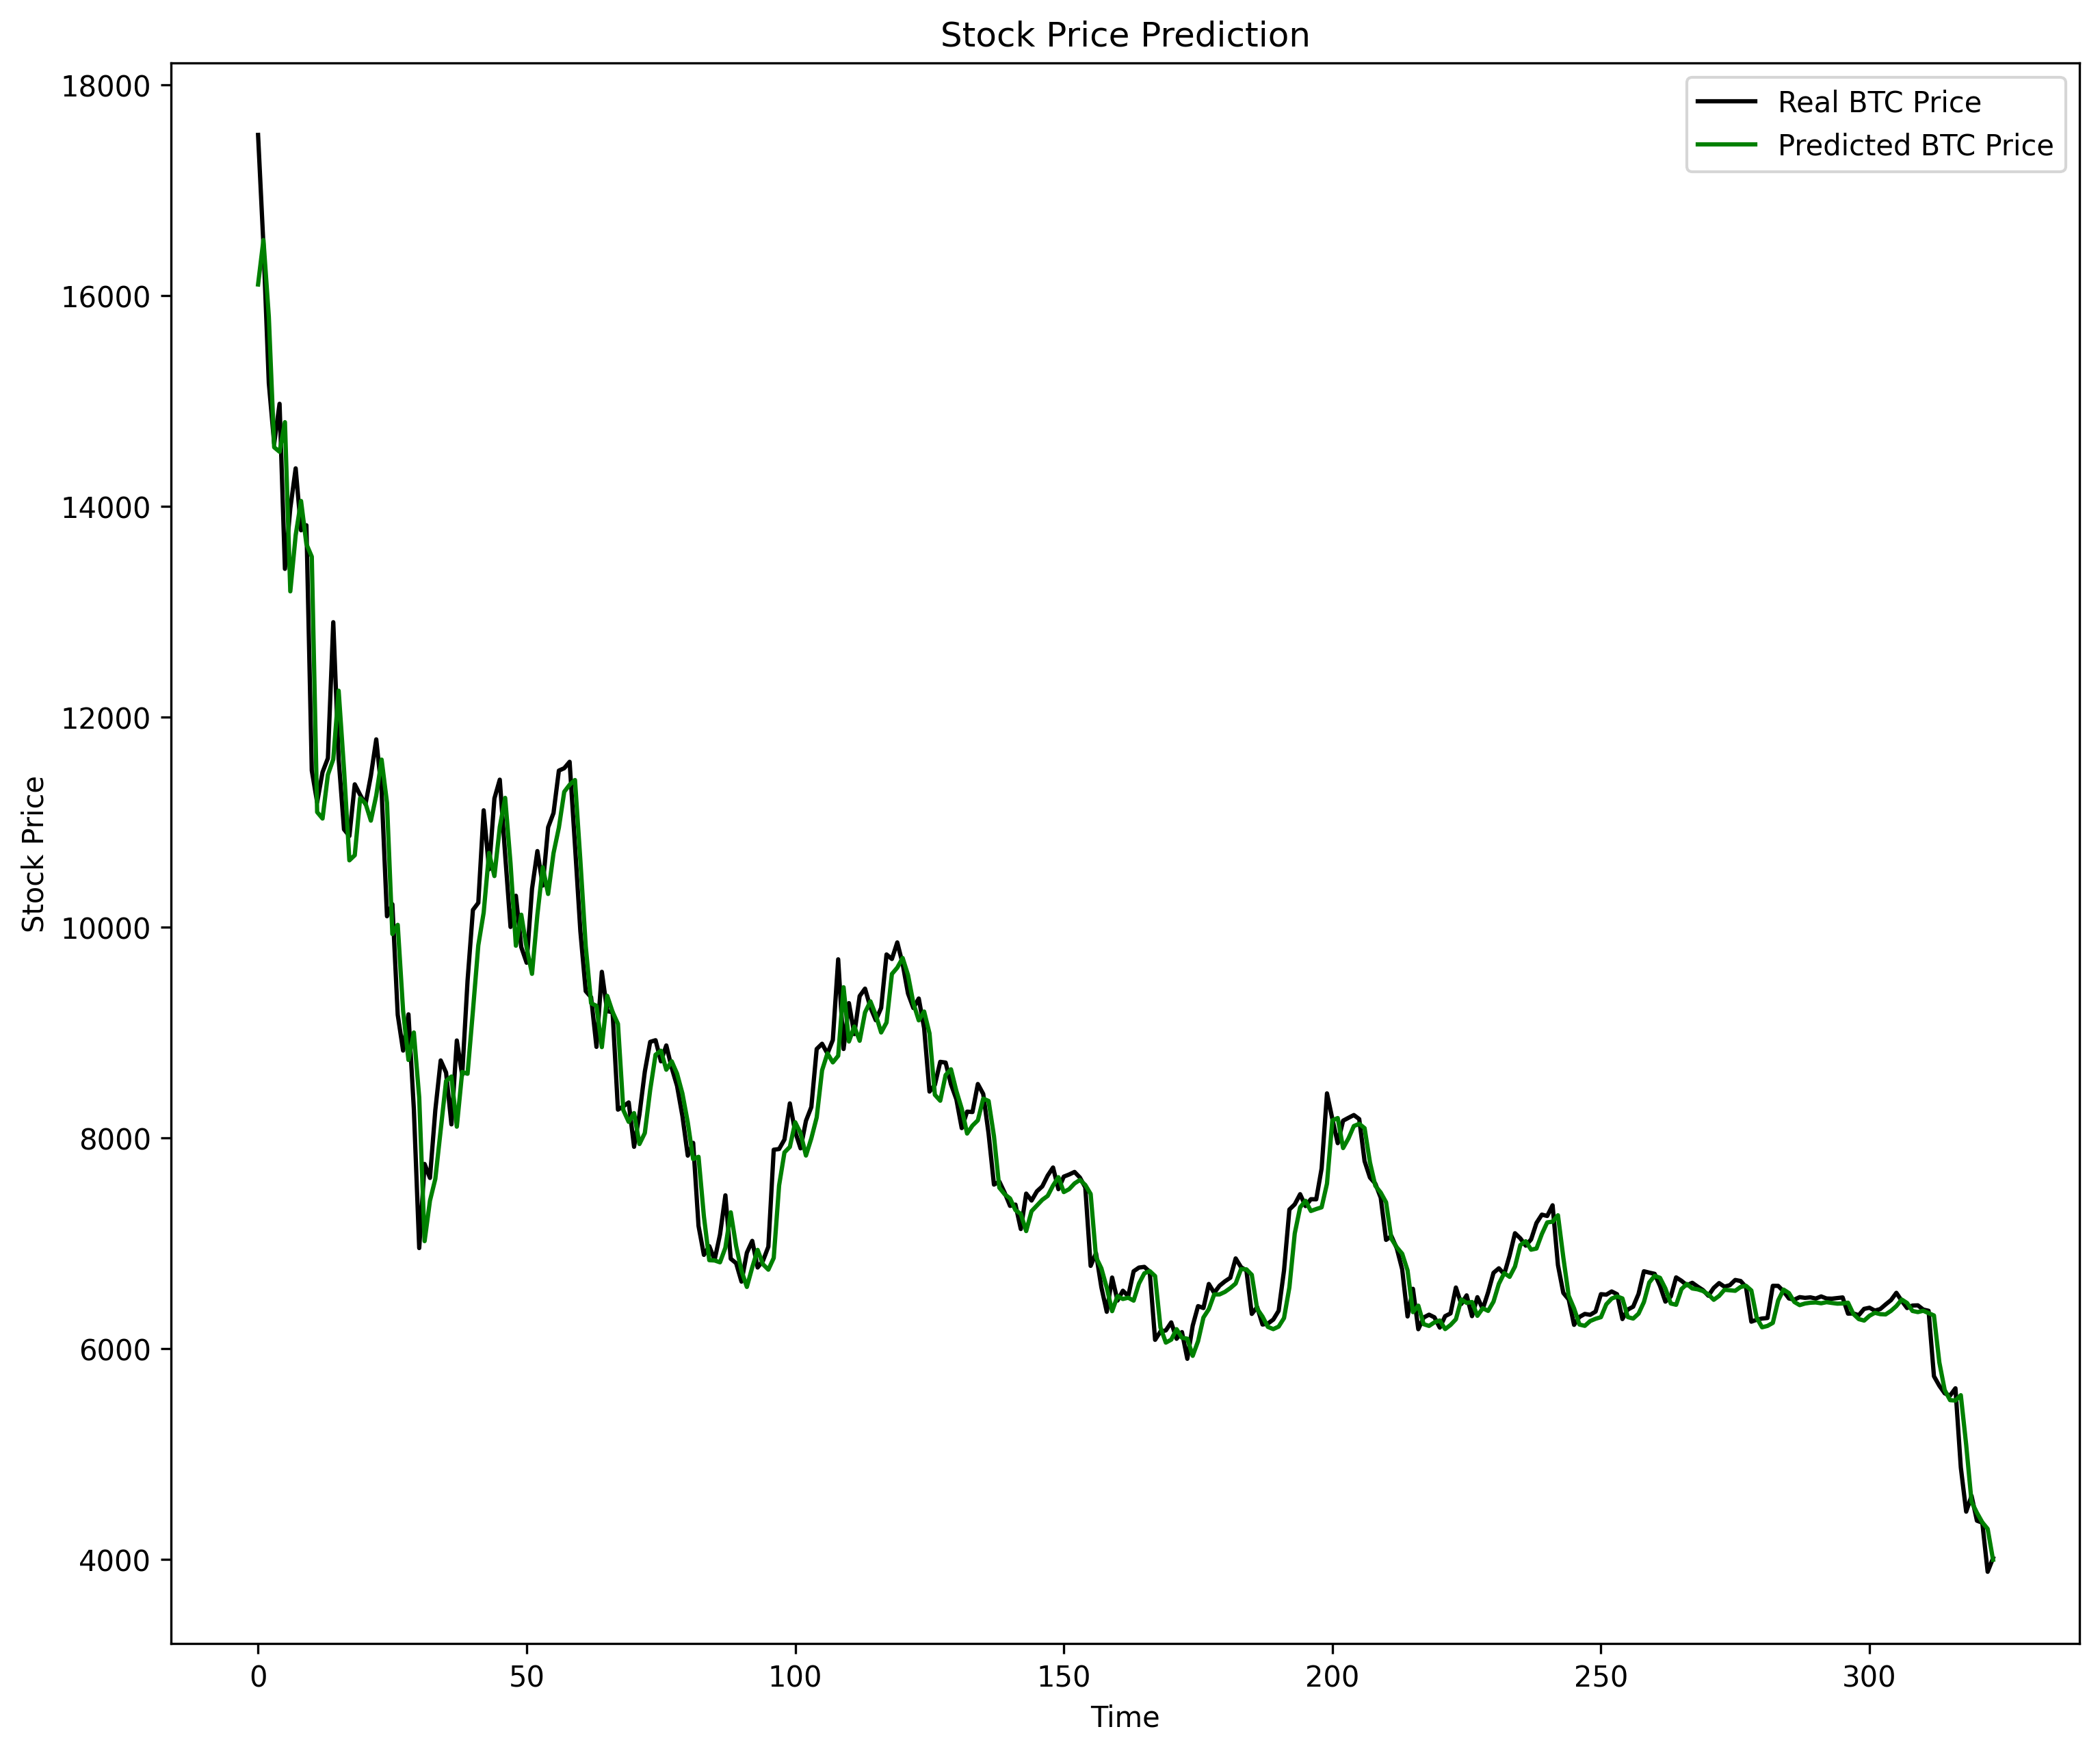

In [ ]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real BTC Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted BTC Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [ ]:
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 1477.17
MSE: 3653759.481
RMSE: 1911.481
MAPE: 3.709 %
SMAPE: 3.613 %
RAE: 0.183
MRAE: 0.0005641682031923931
MdRAE: 0.179 bench: 43794.807
RSE: 0.033
RRSE: 0.181


# 多變量使用的方法 把切好的原始資料套用方法

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)